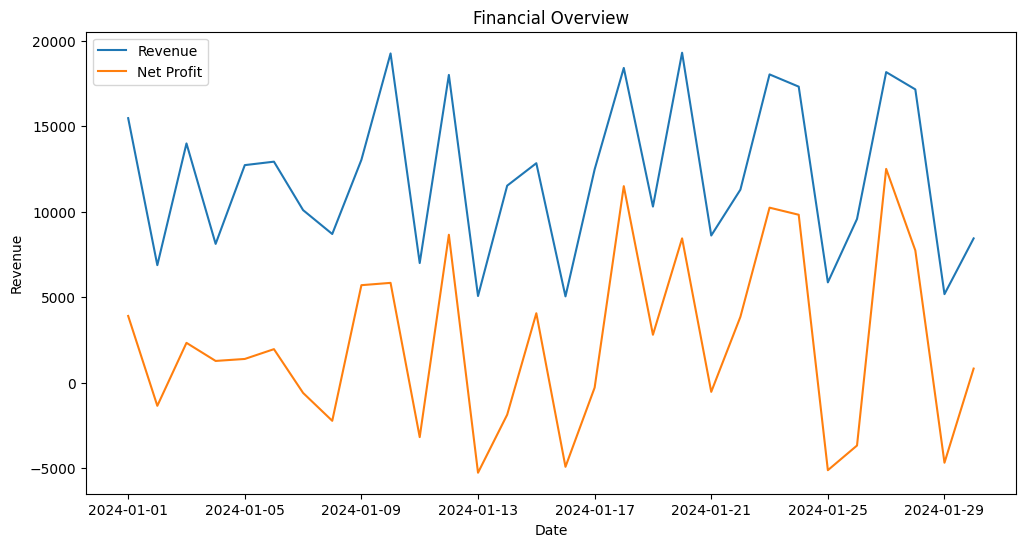

Error fetching inventory


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Financial Data (Replace with real data or API fetch)
data = {
    'Date': pd.date_range(start='2024-01-01', periods=30, freq='D'),
    'Revenue': np.random.randint(5000, 20000, 30),
    'Stock_Purchases': np.random.randint(1000, 8000, 30),
    'Ad_Spend': np.random.randint(500, 3000, 30),
    'Fixed_Costs': 3000  # Constant fixed costs
}
df = pd.DataFrame(data)
df['Net_Profit'] = df['Revenue'] - (df['Stock_Purchases'] + df['Ad_Spend'] + df['Fixed_Costs'])

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Revenue', data=df, label='Revenue')
sns.lineplot(x='Date', y='Net_Profit', data=df, label='Net Profit')
plt.title("Financial Overview")
plt.legend()
plt.show()

# Dynamic Stock & Ad Spend Adjustment
avg_revenue = df['Revenue'].mean()
df['Stock_Adjusted'] = np.where(df['Revenue'] > avg_revenue, df['Stock_Purchases'] * 1.1, df['Stock_Purchases'] * 0.9)
df['Ad_Spend_Adjusted'] = np.where(df['Revenue'] > avg_revenue, df['Ad_Spend'] * 1.1, df['Ad_Spend'] * 0.9)

# Shopify Inventory Integration (Sample API Call)
import requests

SHOPIFY_API_URL = "https://yourstore.myshopify.com/admin/api/2023-01/products.json"
API_KEY = "your_api_key"
PASSWORD = "your_password"

def fetch_inventory():
    response = requests.get(SHOPIFY_API_URL, auth=(API_KEY, PASSWORD))
    if response.status_code == 200:
        return response.json()
    else:
        print("Error fetching inventory")
        return None

inventory_data = fetch_inventory()

# Display Sample Inventory
if inventory_data:
    print(pd.DataFrame(inventory_data['products']))
